In [1]:
from sexpdata import loads, dumps, Symbol
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


In [2]:
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c',
                  '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']

blue = '#4400FF'
yellow = '#FFD500'
purple = '#e377c2'
red = '#d62728'


sta_color = blue
dyn_color = yellow
bare_color = red


def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)
    
def scale(xs):
    return [x/1000 for x in xs]


In [60]:
# convert benchmark sexp to a list of dicts
def load_sexp(fname):
    txt = Path(fname).read_text()
    rows = loads(txt)
    rows = [dict((sym.value(),val) for [sym,val] in row) for row in rows]
    rows = dict((row['full_benchmark_name'].value(),row) for row in rows)
    return rows

# display(rows)

ping = load_sexp('../pingpong/results/table_sexp.txt')
bare = load_sexp('../bare_pingpong/results/table_sexp.txt')
nping = load_sexp('../nping/results/table_sexp.txt')
cham = load_sexp('../chameleons/results/table_sexp.txt')
champ = load_sexp('../chameleons/results_pipes/table_sexp.txt')




In [32]:
def show_pingpong():
    sta = [
        ping['ev_static']['time_per_run_nanos'],
        ping['ipc_static:1']['time_per_run_nanos'],
        ping['ipc_static:1000']['time_per_run_nanos'],
    ]

    dyn = [
        ping['ev_dynamic']['time_per_run_nanos'],
        ping['ipc_dynamic:1']['time_per_run_nanos'],
        ping['ipc_dynamic:1000']['time_per_run_nanos'],
    ]

    zero = [
        0.0, 0.0, 0.0
    ]

    barecaml = [
        bare['lwt_bare_nowrapper']['time_per_run_nanos']
    #    bare['lwt_bare']['time_per_run_nanos']
    #    bare['lwt_bare_mimic-mpst']['time_per_run_nanos']
    ]
    lwt_dyn = [ping['lwt_dynamic']['time_per_run_nanos']]
    lwt_sta = [ping['lwt_static']['time_per_run_nanos']]

    fig, axes = plt.subplots(1, 2, 
                             gridspec_kw={'width_ratios': [1, 3]},
                             squeeze = False)
    (ax_lwt, ax_evpipe) = axes[0][0], axes[0][1]

    def scale(xs):
        return [x/1000 for x in xs]

    def evpipe():
        width = 0.4
        x = np.arange(3)
        dyn_ = scale(dyn)
        sta_ = scale(sta)
        ax_evpipe.bar(x, dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 

        ax_evpipe.bar(x + width, sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        # for legends
        ax_evpipe.bar(x + width, zero, width*0.8, color=bare_color, label='Bare', hatch='//') 

        ax_evpipe.set_xticks(x + width/2)
        ax_evpipe.set_xticklabels(['ev', 'p-1', 'p-1000'], fontsize=20)
        legend = ax_evpipe.legend(loc='lower right', shadow=True, fontsize=20)
        legend.get_frame().set_facecolor('#FFFFFF')

    def lwt():
        width = 0.4
        lwt_dyn_ = scale(lwt_dyn)
        lwt_sta_ = scale(lwt_sta)
        bare_ = scale(barecaml)
        x = np.arange(1)
        ax_lwt.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dyn', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width, lwt_sta_, width*0.8, color=sta_color, label='Sta', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax_lwt.bar(x + width*2, bare_, width*0.8, color=bare_color, label='Bare', error_kw={'ecolor':'black',
                              'linewidth':2,'capthick':2}, hatch='//') 
        ax_lwt.set_xticks(x+width)
        ax_lwt.set_xticklabels(['lwt'], fontsize=20)
        #ax_lwt.set_ylabel('nano sec', fontsize=16) 

    evpipe()
    lwt()

    ax_lwt.set_ylabel('micro sec', fontsize=16) 
    fig.suptitle ('Ping Pong', fontsize=16, y=0.98)

    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    plt.savefig('pingpong.pdf', format='pdf', pad_inches=0)
    plt.show()


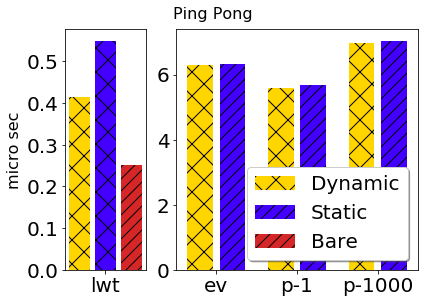

In [33]:
show_pingpong()

In [34]:
def show_nping():
    lwt_dyn = [
#        nping['lwt_dynamic:1']['time_per_run_nanos'],
#        nping['lwt_dynamic:5']['time_per_run_nanos'],
        nping['lwt_dynamic:10']['time_per_run_nanos'],
#        nping['lwt_dynamic:20']['time_per_run_nanos'],
        nping['lwt_dynamic:100']['time_per_run_nanos'],
        nping['lwt_dynamic:500']['time_per_run_nanos'],
        nping['lwt_dynamic:750']['time_per_run_nanos'],
    ]
    
    lwt_dyn_fresh = [
        nping['lwt_dynamic_fresh:10']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:100']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:500']['time_per_run_nanos'],
        nping['lwt_dynamic_fresh:750']['time_per_run_nanos'],
    ]
    lwt_dyn_nocheck = [
        nping['lwt_dynamic_nocheck:10']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:100']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:500']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck:750']['time_per_run_nanos'],
    ]
    lwt_dyn_danger = [
        nping['lwt_dynamic_nocheck_untyped:10']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:100']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:500']['time_per_run_nanos'],
        nping['lwt_dynamic_nocheck_untyped:750']['time_per_run_nanos'],
    ]
    lwt_sta = [
        nping['lwt_static:10']['time_per_run_nanos'],
        nping['lwt_static:100']['time_per_run_nanos'],
        nping['lwt_static:500']['time_per_run_nanos'],
        nping['lwt_static:750']['time_per_run_nanos'],
    ]
    lwt_sta_untyped = [
        nping['lwt_static_untyped:10']['time_per_run_nanos'],
        nping['lwt_static_untyped:100']['time_per_run_nanos'],
        nping['lwt_static_untyped:500']['time_per_run_nanos'],
        nping['lwt_static_untyped:750']['time_per_run_nanos'],
    ]
    lwt_dyn_ = scale(lwt_dyn)
    lwt_dyn_fresh_ = scale(lwt_dyn_fresh)
    lwt_dyn_nocheck_ = scale(lwt_dyn_nocheck)
    lwt_dyn_danger_ = scale(lwt_dyn_danger)
    lwt_sta_ = scale(lwt_sta)
    lwt_sta_untyped_ = scale(lwt_sta_untyped)
    
#    x_labels = ['1', '5', '10', '20', '100', '500', '750']
    x_labels = ['10', '100', '500', '750']
    x = np.arange(4)

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    def lwt():
        width = 0.15
        ax.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax.bar(x + width, lwt_dyn_danger_, width*0.8, color=red, label='Dyn (nocheck)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x')
        ax.bar(x + width * 2, lwt_sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 
        ax.bar(x + width * 3, lwt_sta_untyped_, width*0.8, color=purple, label='Sta (Single)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        ax.set_xticks(x + width)
        ax.set_xticklabels(x_labels, fontsize=20)
        legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
        legend.get_frame().set_facecolor('#FFFFFF')


    lwt()

    ax.set_ylabel('micro sec', fontsize=16) 
#    ax.set_xlabel('Number of channels', fontsize=16) 
    ax.set_title ('N-Ping (number of channels)', fontsize=16, y=0.98)


    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    plt.savefig('nping.pdf', format='pdf', pad_inches=0)
    plt.show()


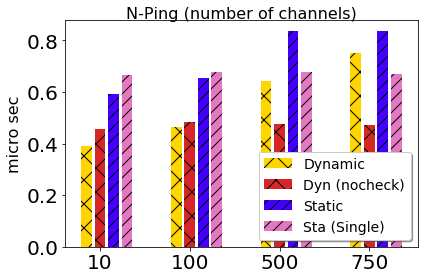

In [35]:
show_nping()

In [58]:
def show_chameleons():
    lwt_dyn = [
        cham['lwt_dynamic:3']['time_per_run_nanos'],
        cham['lwt_dynamic:25']['time_per_run_nanos'],
        cham['lwt_dynamic:50']['time_per_run_nanos'],
        cham['lwt_dynamic:75']['time_per_run_nanos'],
        cham['lwt_dynamic:100']['time_per_run_nanos'],
        cham['lwt_dynamic:500']['time_per_run_nanos'],
        cham['lwt_dynamic:1000']['time_per_run_nanos'],
        cham['lwt_dynamic:2500']['time_per_run_nanos'],
        cham['lwt_dynamic:5000']['time_per_run_nanos'],
    ]
    lwt_dyn_untyped = [
        cham['lwt_dynamic_untyped:3']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:25']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:50']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:75']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:100']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:500']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:1000']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:2500']['time_per_run_nanos'],
        cham['lwt_dynamic_untyped:5000']['time_per_run_nanos'],
    ]    
    lwt_dynamic_fresh_untyped = [
        cham['lwt_dynamic_fresh_untyped:3']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:25']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:50']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:75']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:100']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:500']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:1000']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:2500']['time_per_run_nanos'],
        cham['lwt_dynamic_fresh_untyped:5000']['time_per_run_nanos'],
    ]
    lwt_sta = [
        cham['lwt_static:3']['time_per_run_nanos'],
        cham['lwt_static:25']['time_per_run_nanos'],
        cham['lwt_static:50']['time_per_run_nanos'],
        cham['lwt_static:75']['time_per_run_nanos'],
        cham['lwt_static:100']['time_per_run_nanos'],
        cham['lwt_static:500']['time_per_run_nanos'],
        cham['lwt_static:1000']['time_per_run_nanos'],
        cham['lwt_static:2500']['time_per_run_nanos'],
        cham['lwt_static:5000']['time_per_run_nanos'],
    ]    
    lwt_sta_untyped = [
        cham['lwt_static_untyped:3']['time_per_run_nanos'],
        cham['lwt_static_untyped:25']['time_per_run_nanos'],
        cham['lwt_static_untyped:50']['time_per_run_nanos'],
        cham['lwt_static_untyped:75']['time_per_run_nanos'],
        cham['lwt_static_untyped:100']['time_per_run_nanos'],
        cham['lwt_static_untyped:500']['time_per_run_nanos'],
        cham['lwt_static_untyped:1000']['time_per_run_nanos'],
        cham['lwt_static_untyped:2500']['time_per_run_nanos'],
        cham['lwt_static_untyped:5000']['time_per_run_nanos'],
    ]    
    lwt_dyn_ = scale(lwt_dyn)
    lwt_dynamic_fresh_untyped = scale(lwt_dynamic_fresh_untyped)
    lwt_dyn_untyped = scale(lwt_dyn_untyped)
    lwt_sta_ = scale(lwt_sta)
    lwt_sta_untyped = scale(lwt_sta_untyped)
    
    x_labels = [3, 25, 50, 75, 100, 500, 1000, 2500, 5000]
    x = np.arange(len(x_labels))

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    def lwt():
        width = 0.15
        ax.bar(x, lwt_dyn_, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax.bar(x + width, lwt_dynamic_fresh_untyped, width*0.8, color=red, label='Dyn (Single)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x')
        ax.bar(x + width * 2, lwt_sta_, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 
        ax.bar(x + width * 3, lwt_sta_untyped, width*0.8, color=purple, label='Sta (Single)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 

        ax.set_xticks(x + width)
        ax.set_xticklabels(x_labels, fontsize=10)
        ax.set_yscale('log')
        legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
        legend.get_frame().set_facecolor('#FFFFFF')


    lwt()

    ax.set_ylabel('micro sec', fontsize=16) 
#    ax.set_xlabel('Number of channels', fontsize=16) 
    ax.set_title ('Chameleon (number of sessions)', fontsize=16, y=0.98)


    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    plt.savefig('nping.pdf', format='pdf', pad_inches=0)
    plt.show()


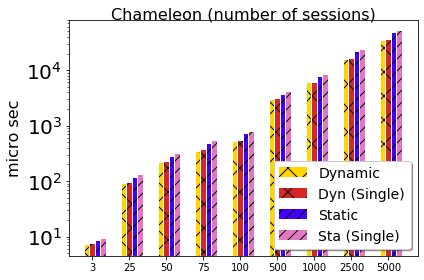

In [59]:
show_chameleons()


In [72]:
def show_chameleons_ipc():
    ipc_dyn = [
#        champ['ipc_dynamic:3']['time_per_run_nanos'],
        champ['ipc_dynamic:25']['time_per_run_nanos'],
        champ['ipc_dynamic:50']['time_per_run_nanos'],
        champ['ipc_dynamic:75']['time_per_run_nanos'],
        champ['ipc_dynamic:100']['time_per_run_nanos'],
        champ['ipc_dynamic:500']['time_per_run_nanos'],
        champ['ipc_dynamic:1000']['time_per_run_nanos'],
    ]
    ipc_sta = [
#        champ['ipc_static:3']['time_per_run_nanos'],
        champ['ipc_static:25']['time_per_run_nanos'],
        champ['ipc_static:50']['time_per_run_nanos'],
        champ['ipc_static:75']['time_per_run_nanos'],
        champ['ipc_static:100']['time_per_run_nanos'],
        champ['ipc_static:500']['time_per_run_nanos'],
        champ['ipc_static:1000']['time_per_run_nanos'],
#        champ['ipc_static:2500']['time_per_run_nanos'],
#        champ['ipc_static:5000']['time_per_run_nanos'],
    ]
    ipc_lwt_dyn = [
#        champ['lwt_ipc_dynamic:3']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:25']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:50']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:75']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:100']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:500']['time_per_run_nanos'],
        champ['lwt_ipc_dynamic:1000']['time_per_run_nanos'],
#        champ['lwt_ipc_dynamic:2500']['time_per_run_nanos'],
#        champ['lwt_ipc_dynamic:5000']['time_per_run_nanos'],
    ]

    ipc_dyn = scale(ipc_dyn)
    ipc_sta = scale(ipc_sta)
    ipc_lwt_dyn = scale(ipc_lwt_dyn)
    
#    x_labels = [3, 25, 50, 75, 100, 500, 1000]
    x_labels = [25, 50, 75, 100, 500, 1000]
    x = np.arange(len(x_labels))

    fig, axes = plt.subplots(ncols=1, nrows=1, squeeze = False)
    ax = axes[0][0]

    def lwt():
        width = 0.15
        ax.bar(x, ipc_lwt_dyn, width*0.8, color=dyn_color, label='Dynamic', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x') 
        ax.bar(x + width, ipc_dyn, width*0.8, color=red, label='Dyn (Lwt)', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='x')
        ax.bar(x + width * 2, ipc_sta, width*0.8, color=sta_color, label='Static', error_kw={'ecolor':'black',
                                  'linewidth':2,'capthick':2}, hatch='//') 
#        ax.bar(x + width * 3, lwt_sta_untyped, width*0.8, color=purple, label='Sta (Single)', error_kw={'ecolor':'black',
#                                  'linewidth':2,'capthick':2}, hatch='//') 

        ax.set_xticks(x + width)
        ax.set_xticklabels(x_labels, fontsize=10)
        ax.set_yscale('log')
        legend = ax.legend(loc='lower right', shadow=True, fontsize=14)
        legend.get_frame().set_facecolor('#FFFFFF')


    lwt()

    ax.set_ylabel('micro sec', fontsize=16) 
#    ax.set_xlabel('Number of channels', fontsize=16) 
    ax.set_title ('Chameleon via Pipes (number of sessions)', fontsize=16, y=0.98)


    plt.tight_layout()
    make_space_above(axes, topmargin=0.4)

    #plt.tight_layout()
    plt.savefig('nping.pdf', format='pdf', pad_inches=0)
    plt.show()


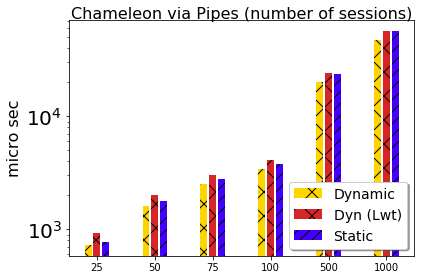

In [73]:
show_chameleons_ipc()